# Data Ingest and Visualization - Matplotlib and Pandas

## Putting it all Together

UP to this point, we have walked through tasks that are often involved in handling and processing data using the workshop-ready cleaned files that we have provided. In this wrap-up exercise, we will perform many of the same tasks with real datasets. This lesson also covers data visualization.

As opposed to the prvious ones, this lesson does not give step-by-stp directions to each of the tasks. Use the lesson materials you've already gone through as well as the Python documentation to help you along.

## Clean up your data and open it using Python and Pandas

The 'bouldercreek_09_2013.txt' file contains multiple comments in the file, remove them with the pd.read_csv() command and also delimit the actual data using `sep='\t'`.

In [25]:
import pandas as pd
import os as os

pwd = os.getcwd()
print(pwd)

os.chdir('/home/meelyn/Documents/cloud_development/sw-python-ecology-lesson/')
# pd.read_csv?
boulder_creek = pd.read_csv('data/bouldercreek_09_2013.txt', sep='\t',comment='#') # separate or delimiter by tabs instead of commas,
print(boulder_creek)
# specify that comments are designated by '#' so it ignores all the commented section above

boulder_creek = boulder_creek.iloc[1:].reset_index()
print(boulder_creek)


/home/meelyn/Documents/cloud_development/sw-python-ecology-lesson
     agency_cd   site_no          datetime tz_cd 04_00060 04_00060_cd
0           5s       15s               20d    6s      14n         10s
1         USGS  06730200  2013-09-01 00:00   MDT       57           A
2         USGS  06730200  2013-09-01 00:15   MDT       57           A
3         USGS  06730200  2013-09-01 00:30   MDT       57           A
4         USGS  06730200  2013-09-01 00:45   MDT       57           A
...        ...       ...               ...   ...      ...         ...
2871      USGS  06730200  2013-09-30 22:45   MDT      334           A
2872      USGS  06730200  2013-09-30 23:00   MDT      334           A
2873      USGS  06730200  2013-09-30 23:15   MDT      334           A
2874      USGS  06730200  2013-09-30 23:30   MDT      334           A
2875      USGS  06730200  2013-09-30 23:45   MDT      339           A

[2876 rows x 6 columns]
      index agency_cd   site_no          datetime tz_cd 04_00060 04_0

Create a DataFrame that includes only the values of the data that are useful to you. 

Convert any measurements in imperial units into SI units.

Change the name of the columns in the dataframe.

In [16]:
df = pd.DataFrame({'1stcolumn':[100,200],
                   '2ndcolumn':[10,20]}) # this just creates a dataframe for the example
print('With the old column names:\n') # the \n makes a new line, so it's easier to see
print(df)

df.columns = ['FirstColumn', 'SecondColumn'] # rename the columns!
print('\n\nWith the new column names:\n')
print(df)

With the old column names:

   1stcolumn  2ndcolumn
0        100         10
1        200         20


With the new column names:

   FirstColumn  SecondColumn
0          100            10
1          200            20


In [22]:
print(boulder_creek.columns)
boulder_creek.columns = ['agency_cd', 'site_no', 'datetime', 'tz_cd', '04_60', '04_60_cd']
print(boulder_creek.columns)

Index(['agency_cd', 'site_no', 'datetime', 'tz_cd', '04_60', '04_60_cd'], dtype='object')
Index(['agency_cd', 'site_no', 'datetime', 'tz_cd', '04_60', '04_60_cd'], dtype='object')


## Matplotlib package

Matplotlib is a Python package that is widely used throughout the scientific Python community to create high-quality and publication-ready graphics. It supports a wide range of raster and vector graphics formats including png, postscript, eps, pdf, and svg.

Moreover, matplotlib is the actual engine behind the plotting capabilities of both Pandas and plotnine packages.

For example, when we call the `plot` method on Pandas data objects, we actually use the matplotlib package.

First, import the pyplot toolbox:

       record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0              1      7   16  1977        2         NL    M             32.0   
1              2      7   16  1977        3         NL    M             33.0   
2              3      7   16  1977        2         DM    F             37.0   
3              4      7   16  1977        7         DM    M             36.0   
4              5      7   16  1977        3         DM    M             35.0   
...          ...    ...  ...   ...      ...        ...  ...              ...   
35544      35545     12   31  2002       15         AH  NaN              NaN   
35545      35546     12   31  2002       15         AH  NaN              NaN   
35546      35547     12   31  2002       10         RM    F             15.0   
35547      35548     12   31  2002        7         DO    M             36.0   
35548      35549     12   31  2002        5        NaN  NaN              NaN   

       weight  
0         NaN  
1      

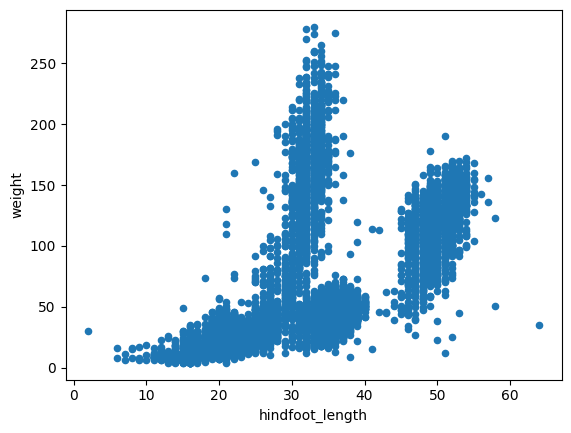

matplotlib.axes._axes.Axes

In [37]:
# makes matplotlib figures appear within Jupyter notebook windows instead of creating a new window
%matplotlib inline
import matplotlib.pyplot as plt

surveys = pd.read_csv('data/surveys.csv')
print(surveys)
my_plot = surveys.plot('hindfoot_length', 'weight', kind='scatter')
plt.show() # not necessary in Jupyter notebooks
type(my_plot)

## `plt` pyplot versus object-based matplotlib

Matplotlib integrates nicely with the NumPy package and can use NumPy arrays as input to the available plot functions. Consider the following example data, created with NumPy by drawing 1000 samples from a normal distribution with a mean value of 0 and a standard deviation of 0.1.

[-1.17918026e-01 -3.21152997e-02 -1.33928481e-01  1.03350001e-01
  1.90746518e-02 -1.01433952e-01  8.69864640e-02  4.33230627e-03
  3.40346939e-02 -7.06554539e-03  7.92378235e-02  9.13947392e-02
 -1.12140537e-01 -2.15814043e-03  1.94093439e-01 -2.19380120e-01
  3.69470172e-02 -1.69613570e-01  4.12668517e-02  2.42696229e-01
 -4.09176963e-03  2.21279088e-01  2.11863786e-01  1.63658063e-01
  2.54451347e-02  8.44591765e-02 -1.21069644e-01  6.01322750e-02
 -2.63444352e-02  1.45465239e-01 -9.03461522e-02  1.74236385e-03
 -8.36107879e-02  8.16132449e-02 -9.89394960e-03  5.52708201e-02
 -4.78290819e-02  8.74516273e-02 -3.93932057e-02 -2.11505599e-02
  1.07346031e-01 -7.47965726e-02 -1.39854158e-01 -5.15567541e-02
  3.88595298e-03 -5.54233294e-02  2.13282808e-02 -9.34917799e-02
 -6.13763004e-03 -6.69493463e-02 -4.84436745e-02 -8.06289812e-02
  7.60572830e-02  5.47556300e-02 -1.32129424e-01  1.05653648e-01
  1.78084536e-01 -1.34893926e-01 -2.07775233e-02 -2.58638319e-02
 -1.26045219e-01 -2.31306

(array([  8.,  35.,  83., 178., 224., 215., 147.,  69.,  33.,   8.]),
 array([-0.29613108, -0.23615001, -0.17616894, -0.11618787, -0.0562068 ,
         0.00377427,  0.06375534,  0.12373641,  0.18371748,  0.24369855,
         0.30367962]),
 <BarContainer object of 10 artists>)

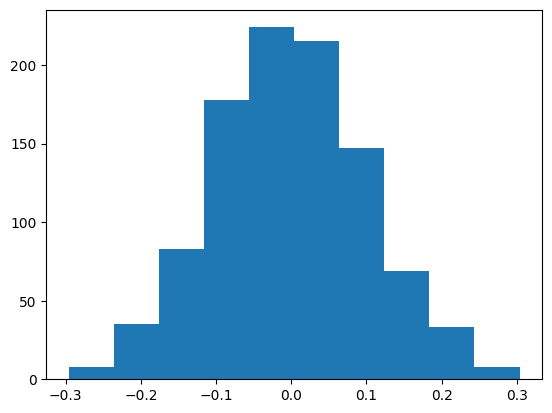

In [31]:
import numpy as np

sample_data = np.random.normal(0, 0.1, 1000)
print(sample_data)

plt.hist(sample_data)

or create matplotlib `figure` and `axis` objects first and subsequently add a histogram with 30 data bins:

(array([ 3.,  2.,  3.,  9.,  8., 18., 21., 24., 38., 52., 58., 68., 79.,
        80., 65., 83., 66., 66., 56., 53., 38., 36., 21., 12., 15., 12.,
         6.,  4.,  3.,  1.]),
 array([-0.29613108, -0.27613739, -0.2561437 , -0.23615001, -0.21615632,
        -0.19616263, -0.17616894, -0.15617525, -0.13618156, -0.11618787,
        -0.09619418, -0.07620049, -0.0562068 , -0.03621311, -0.01621942,
         0.00377427,  0.02376796,  0.04376165,  0.06375534,  0.08374903,
         0.10374272,  0.12373641,  0.1437301 ,  0.16372379,  0.18371748,
         0.20371117,  0.22370486,  0.24369855,  0.26369224,  0.28368593,
         0.30367962]),
 <BarContainer object of 30 artists>)

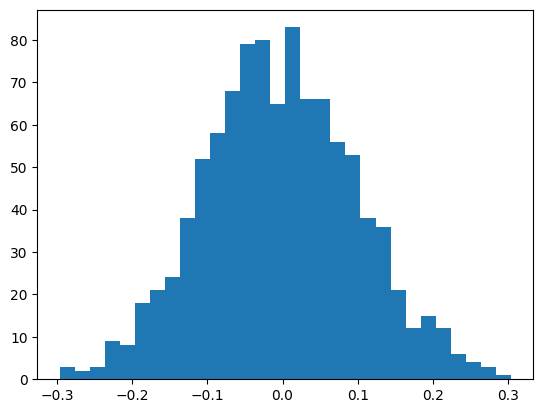

In [32]:
fig, ax = plt.subplots() # initiate an empty figure and axis matplotlib object
ax.hist(sample_data, 30)

Although the later approach requires a little bit more code to create the same plot, the advantage is that it gives us full control over the plot and we can add new items such as labels, grid lines, title, and other visual elements.

For example, we can add additional axes to the figure and customize their labels:

/tmp/ipykernel_1198158/3316510411.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


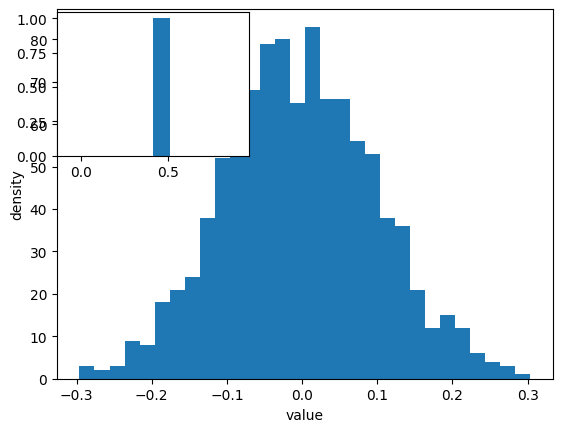

In [34]:
# prepare a matplotlib figure
fig, ax1 = plt.subplots() # fig is the figure for the axes to be plotted in?
ax1.hist(sample_data, 30)

# add labels
ax1.set_ylabel('density')
ax1.set_xlabel('value')

# define and sample beta distribution
a = 5
b = 10
beta_draws = np.random.beta(a,b)

# add additional axes to the figure to plot beta distribution
ax2 = fig.add_axes([0.125, 0.575, 0.3, 0.3]) # number coordinates correspond to left, bottom, width, height
ax2.hist(beta_draws)

## Link matplotlib, Pandas, and plotnine

When we create a plot using pandas or plotnine, both libraries use matplotlib to create those plots. 

The plots created in pandas or plotnine are matplotlib objects, which enables us to use some of the advanced plotting options available in matplotlib library. 

Because the objects output by pandas and plotnine can be read by matplotlib, we have many more options than any one library can provide, offering a consistent environment to make publication-quality visualizations

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

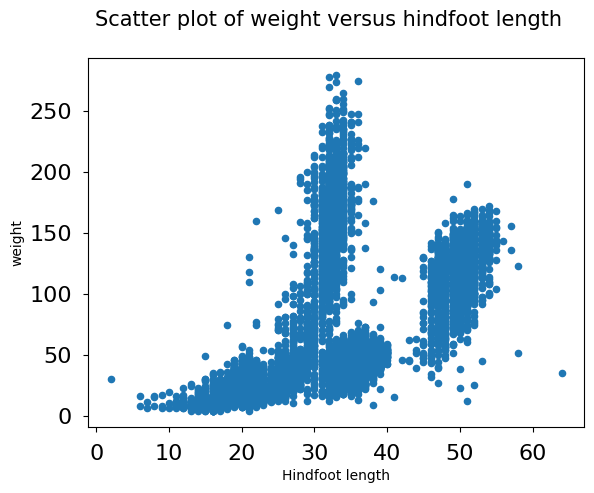

In [35]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure

surveys.plot('hindfoot_length', 'weight', kind='scatter', ax=ax1)

# provide further adaptations with matplotlib:
ax1.set_xlabel('Hindfoot length')
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

To retrieve the matplotlib figure object from plotnine for customization, use the `draw()` function in plotnine:

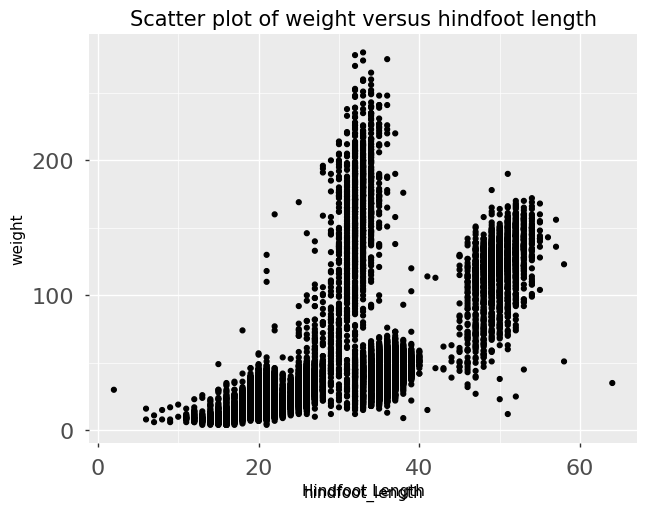

In [50]:
import plotnine as p9
myplot = (p9.ggplot(data=surveys.dropna(),
                    mapping=p9.aes(x='hindfoot_length',
                                   y='weight')) +
            p9.geom_point()
        )

# convert output plotnine to a matplotlib object
my_plt_version = myplot.draw()

# Provide further adaptations with matplotlib:
p9_ax = my_plt_version.axes[0] # each subplot is an item in a list (array)
p9_ax.set_xlabel('Hindfoot Length')
p9_ax.tick_params(labelsize=16, pad=8)
p9_ax.set_title('Scatter plot of weight versus hindfoot length', fontsize=15)

my_plt_version

## Challenge - Pandas adn Matplotlib

Load the `streamgage` data set with Pandas, subset the week of the 2013 Front Range flood (September 11 through 15).

create a hydrograph (line plot) of the discharge data using Pandas, linking it to an empty matplotlib `ax` object. 

Create a second axis that displays the whole dataset. 

Adapt the title and axes' labels using matplotlib.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# load the streamgage data

discharge = pd.read_csv('data/bouldercreek_09_2013.txt',
                        skiprows=27,
                        delimiter='\t',
                        names=['agency', 'site_id',  'datetime',
                               'timezone', 'flow_rate', 'discharge_cd'])
discharge['datetime'] = pd.to_datetime(discharge['datetime'])

# subset the data to include 2013 september 11-15th
flood = discharge[(discharge['datetime'] >= '2013-09-11') & (discharge['datetime'] <= '2013-09-15')]
print(flood)

# create a hydrograph plot (line plot)

     agency  site_id            datetime timezone  flow_rate discharge_cd
960    USGS  6730200 2013-09-11 00:00:00      MDT         88            A
961    USGS  6730200 2013-09-11 00:15:00      MDT         90            A
962    USGS  6730200 2013-09-11 00:30:00      MDT         90            A
963    USGS  6730200 2013-09-11 00:45:00      MDT         90            A
964    USGS  6730200 2013-09-11 01:00:00      MDT         92            A
...     ...      ...                 ...      ...        ...          ...
1340   USGS  6730200 2013-09-14 23:00:00      MDT       1340            A
1341   USGS  6730200 2013-09-14 23:15:00      MDT       1340            A
1342   USGS  6730200 2013-09-14 23:30:00      MDT       1340            A
1343   USGS  6730200 2013-09-14 23:45:00      MDT       1340            A
1344   USGS  6730200 2013-09-15 00:00:00      MDT       1340            A

[385 rows x 6 columns]
